In [1]:
##Import packages needed (and some not needed....)

import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter
from functools import reduce

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
scipy 1.10.0
seaborn 0.12.2


In [2]:
df_none = pd.read_excel("Dataframe_blank_auc_s_No azole DMS validations24H_2023-10-04.xlsx", header=0)
df_fluco = pd.read_excel("Dataframe_blank_auc_s_Fluconazole DMS validations24H_2023-10-04.xlsx", header=0)
df_itra = pd.read_excel("Dataframe_blank_auc_s_Itraconazole DMS validations24H_2023-10-05.xlsx", header=0)
df_vori = pd.read_excel("Dataframe_blank_auc_s_Voriconazole DMS validations24H_2023-10-04.xlsx", header=0)
df_posaco = pd.read_excel("Dataframe_blank_auc_s_Posaconazole DMS validations24H_2023-10-05.xlsx", header=0)
df_isa = pd.read_excel("Dataframe_blank_auc_s_Isavuconazole DMS validations24H_2023-10-06.xlsx", header=0)
df_clotri = pd.read_excel("Dataframe_blank_auc_s_Clotrimazole DMS validations24H_2023-10-06.xlsx", header=0)
df_s = pd.read_excel("select_coef_validations_mutants_2023_2023-10-04.xlsx", header=0, index_col=0)

In [4]:
df_list = [df_none, df_fluco, df_itra, df_vori, df_posaco, df_isa, df_clotri] 
for df in df_list:
    df['auc_noblank_norm'] = df['auc_noblank'] / df.loc[df['strains'] == 'WT', 'auc_noblank'].values[0]
    df["auc_noblank_norm_log2"] = np.log2(df["auc_noblank_norm"])
    
    df["auc_noblank_log2"] = np.log2(df["auc_noblank"])
    df['auc_noblank_log2_norm'] = df['auc_noblank_log2'] / df.loc[df['strains'] == 'WT', 'auc_noblank_log2'].values[0]

In [5]:
concat_df = pd.concat([df_none, df_fluco, df_itra, df_vori, df_posaco, df_isa, df_clotri])

# If you want to reset the index in the result DataFrame
concat_df=concat_df.reset_index(drop=True)

concat_df

,antifungals,strains,Resistance categories,auc,auc_noblank,s,auc_noblank_norm,auc_noblank_norm_log2,auc_noblank_log2,auc_noblank_log2_norm
0,None,A146H,WT-like,61.842755,49.246485,-0.002081,1.027823,0.039592,5.621949,1.007092
1,None,A476N,WT-like,60.069248,47.472977,-0.030731,0.990808,-0.013322,5.569035,0.997614
2,None,G303P,WT-like,60.971955,48.375685,-0.028149,1.009649,0.013853,5.596210,1.002482
3,None,G464S,WT-like,66.717893,54.121622,0.021436,1.129572,0.175776,5.758133,1.031488
4,None,G465Q,WT-like,63.123125,50.526855,0.014966,1.054546,0.076622,5.658978,1.013726
...,...,...,...,...,...,...,...,...,...,...
247,Clotrimazole,W57F,Posaconazole only,38.504935,21.063770,-0.074249,0.873930,-0.194410,4.396692,0.957655
248,Clotrimazole,WT,WT,41.543513,24.102348,0.000000,1.000000,0.000000,4.591102,1.000000
249,Clotrimazole,Y132M,Clotrimazole only,47.498670,30.057505,0.373356,1.247078,0.318552,4.909653,1.069385
250,Clotrimazole,Y132N,Voriconazole only,23.645920,6.204755,-0.376692,0.257434,-1.957728,2.633374,0.573582


In [6]:
#Save the data in an excel file if you want to work with it in an other software 
name1 = "Concat_df_auclog2_all"  
concat_df.to_excel(f"c:{name1}.xlsx", index = False)

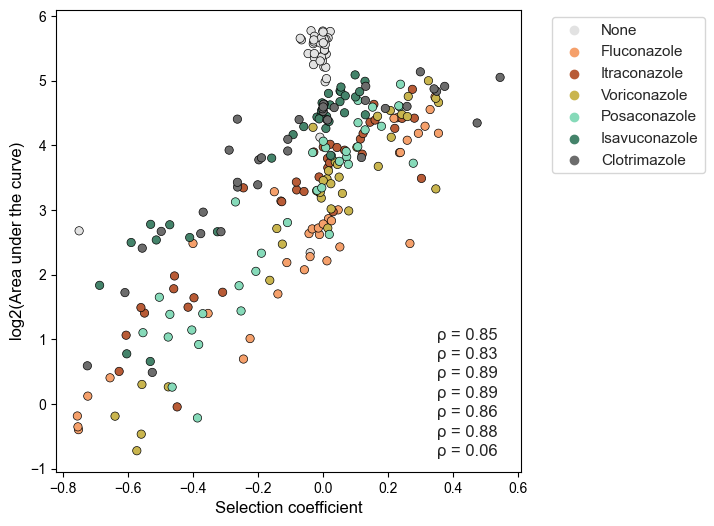

In [7]:
fig = plt.subplots(figsize=(6, 6))

names = ["None","FLZ", "ITZ", "VRZ", "PSZ", "ISZ", "CLZ"]
shapes = [1,2,3,4,5,6,7]
# Remove the grid
sns.set_theme(style="whitegrid")

custom_palette = sns.blend_palette(["#E2E2E2","#F59F6A","#B85B36","#CAB54D","#86DAB9","#44836A","#6C6C6C"],n_colors=7)

sns.scatterplot(data=concat_df,y="auc_noblank_log2",x="s",
                hue="antifungals",
                palette=custom_palette,edgecolor="black")
                            
df_list = [df_none, df_clotri, df_isa, df_posaco,df_itra,df_vori,df_fluco]                            
height = [-0.8,-0.5,-0.2,0.1,0.4,0.7,1]

i=0
for df in df_list:
    result = sp.stats.spearmanr(df["auc_noblank_log2"],df["s"])
    coeff = result[0]
    p_value = "{:.1e}".format(result[1])
    R2 = coeff**2
    text = "ρ = " + str(round(coeff, 2))
    plt.text(0.35,height[i], text , fontsize = 12)
    i+=1
    
plt.ylabel("log2(Area under the curve)", fontsize=12)
plt.xlabel("Selection coefficient", fontsize=12)   
# Remove the grid using Matplotlib
plt.grid(False)     


plt.legend( scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_val_dms.svg', format='svg', dpi=300)
plt.savefig('correl_val_dms.png', format='png', dpi=300)

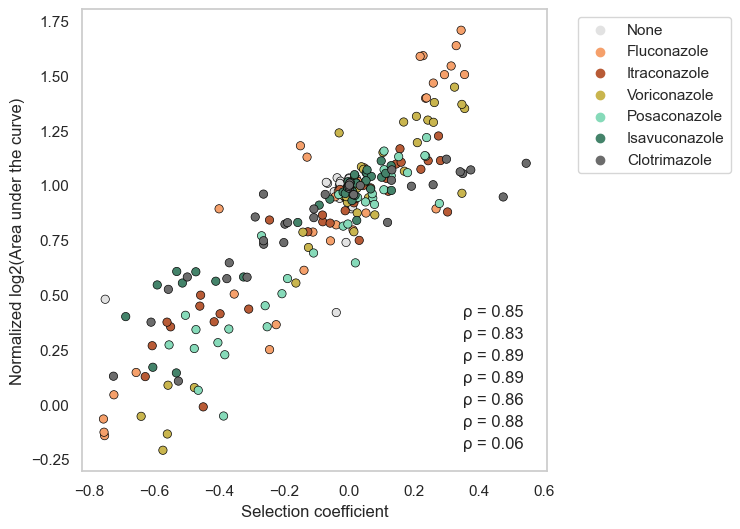

In [8]:
fig = plt.subplots(figsize=(6, 6))

names = ["None","FLZ", "ITZ", "VRZ", "PSZ", "ISZ", "CLZ"]
shapes = [1,2,3,4,5,6,7]
# Remove the grid
sns.set_theme(style="whitegrid")

custom_palette = sns.blend_palette(["#E2E2E2","#F59F6A","#B85B36","#CAB54D","#86DAB9","#44836A","#6C6C6C"],n_colors=7)

sns.scatterplot(data=concat_df,y="auc_noblank_log2_norm",x="s",
                hue="antifungals",
                palette=custom_palette,edgecolor="black")
                            
df_list = [df_none, df_clotri, df_isa, df_posaco,df_itra,df_vori,df_fluco]                            
height = [-0.2,-0.1,0,0.1,0.2,0.3,0.4]

i=0
for df in df_list:
    result = sp.stats.spearmanr(df["auc_noblank_log2_norm"],df["s"])
    coeff = result[0]
    p_value = "{:.1e}".format(result[1])
    R2 = coeff**2
    text = "ρ = " + str(round(coeff, 2))
    plt.text(0.35,height[i], text , fontsize = 12)
    i+=1
    
plt.ylabel("Normalized log2(Area under the curve)", fontsize=12)
plt.xlabel("Selection coefficient", fontsize=12)   
# Remove the grid using Matplotlib
plt.grid(False)     


plt.legend( scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_val_dms_log2_norm.svg', format='svg', dpi=300)
plt.savefig('correl_val_dms_log2_norm.png', format='png', dpi=300)

In [9]:
##boxplot

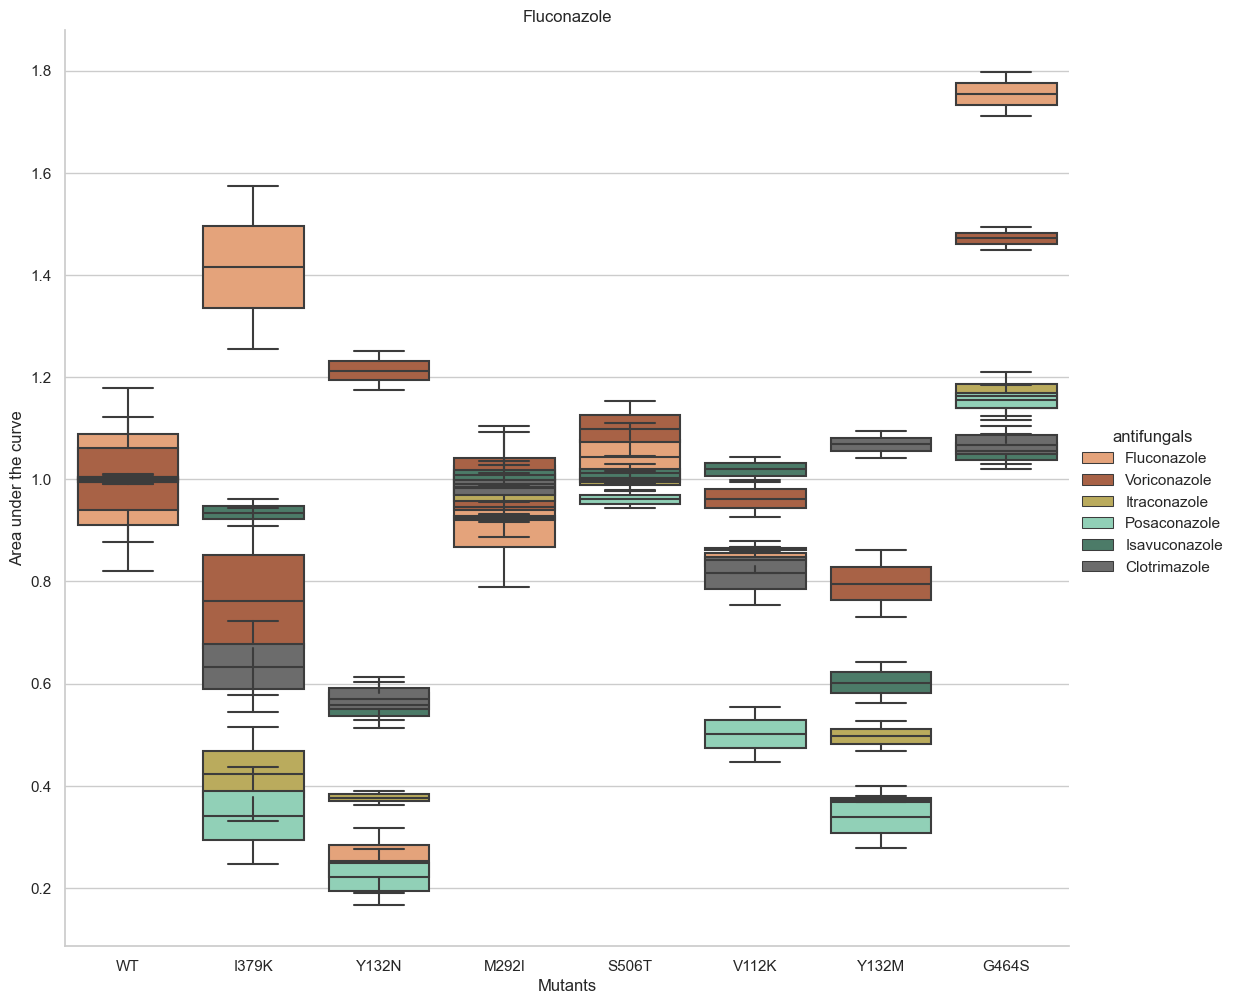

In [10]:
custom_palette = sns.blend_palette(["#F59F6A","#B85B36","#CAB54D","#86DAB9","#44836A","#6C6C6C"],n_colors=6)
order = ["WT","I379K","Y132N","M292I","S506T","V112K",
                    "Y132M","G464S"]
# Adjust the height and aspect parameters for the desired figure size
box = sns.catplot(
    x="strains", 
    y="auc_noblank_log2_norm", 
    data=concat_df_r, 
    hue_order=["Fluconazole","Voriconazole","Itraconazole","Posaconazole","Isavuconazole","Clotrimazole"], 
    kind="box",
    order=order,
    hue="antifungals",
    palette=custom_palette,
    height=10,  # Adjust the height value
        aspect=1.1,  # Adjust the aspect value 
    dodge=False
)

# Set axis labels
box.set_axis_labels('Mutants', 'Area under the curve')

# Set the title
plt.title("Fluconazole", size=12)
plt.rcParams['svg.fonttype'] = 'none'
# Save the figure
name1 = "Boxplot_AUC_subset_all_" 
plt.savefig(f"c:{name1}.png", format='png', dpi=300)
plt.savefig(f"c:{name1}.svg", format='svg', transparent=True,dpi=300)
plt.show()

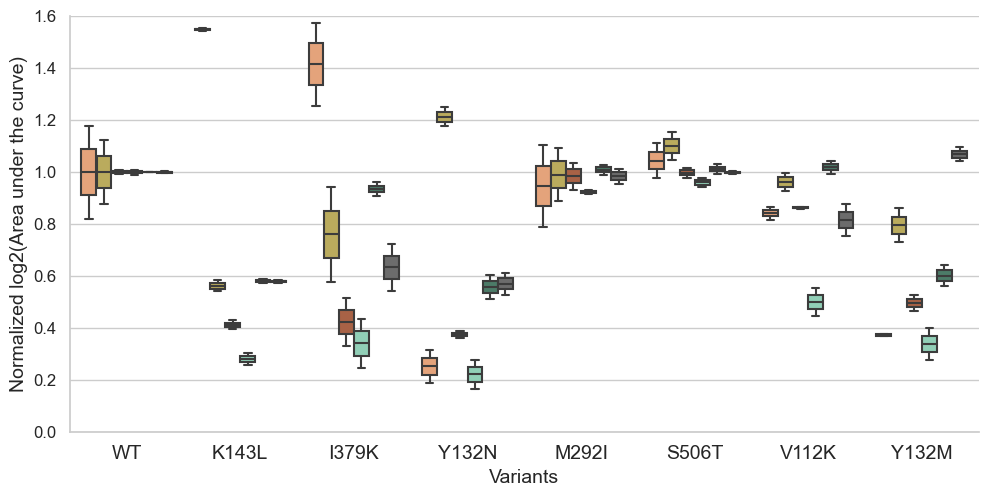

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.blend_palette(["#F59F6A","#CAB54D","#B85B36","#86DAB9","#44836A","#6C6C6C"], n_colors=6)
order = ["WT","K143L","I379K","Y132N","M292I","S506T","V112K","Y132M"]

# Adjust the height and aspect parameters for the desired figure size
box = sns.catplot(
    x="strains", 
    y="auc_noblank_log2_norm", 
    data=concat_df_r, 
    hue_order=["Fluconazole","Voriconazole","Itraconazole","Posaconazole","Isavuconazole","Clotrimazole"], 
    kind="box",
    order=order,
    hue="antifungals",
    palette=custom_palette,
    height=5,  # Adjust the height value
    aspect=2,  # Adjust the aspect value 
    dodge=True,legend=False
)

# Set y-axis limits
box.set(ylim=(0.15, 1.6))

# Increase the font size for axis labels and ticks
box.set_axis_labels('Variants', 'Normalized log2(Area under the curve)', fontsize=14)
box.set_xticklabels(fontsize=14)
box.set_yticklabels(fontsize=12)

# Set the title
#plt.title("Boxplot of AUC subset for all antifungals", size=16)

# Save the figure
name1 = "Boxplot_AUC_subset_all_" 
plt.savefig(f"c:{name1}.png", format='png', dpi=300)
plt.savefig(f"c:{name1}.svg", format='svg', transparent=True, dpi=300)
plt.show()


In [ ]:
##with categories

In [23]:
name1 = "Concat_df_auclog2_all_categories.xlsx"  
concat_df2=pd.read_excel(name1)

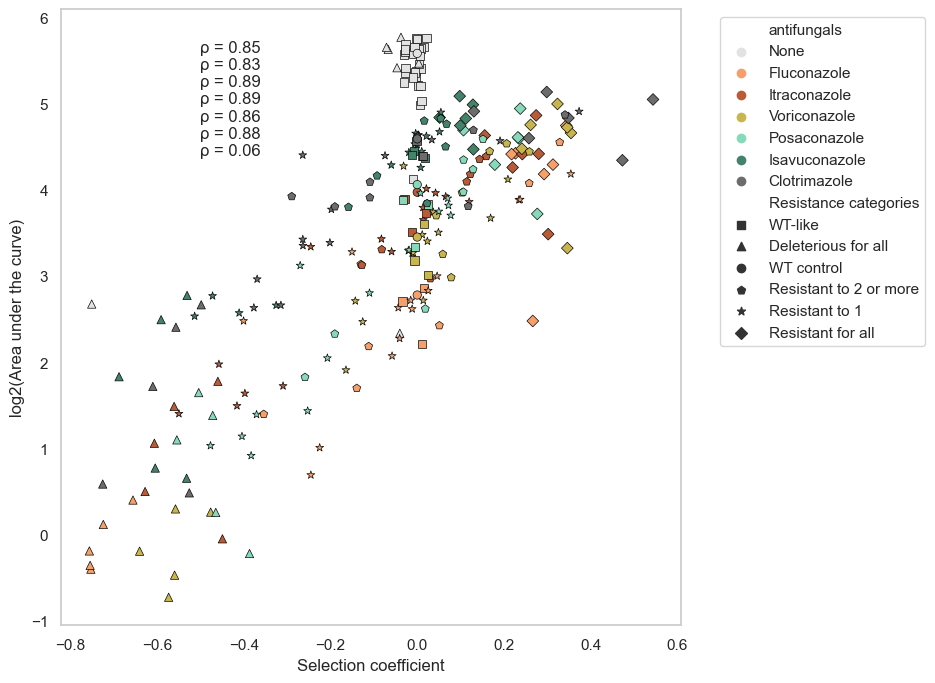

In [24]:
fig = plt.subplots(figsize=(8, 8))

names = ["None","FLZ", "ITZ", "VRZ", "PSZ", "ISZ", "CLZ"]
shapes = [1,2,3,4,5,6,7]
# Remove the grid
sns.set_theme(style="whitegrid")

# Define a dictionary of marker styles for each category
marker_styles = {'WT control': 'o', 'WT-like': 's', 'Deleterious for all': '^',
                "Resistant for all" : "D","Resistant to 1":"*","Resistant to 2 or more":"p"}


custom_palette = sns.blend_palette(["#E2E2E2","#F59F6A","#B85B36","#CAB54D","#86DAB9","#44836A","#6C6C6C"],n_colors=7)

sns.scatterplot(data=concat_df2,y="auc_noblank_log2",x="s",
                hue="antifungals",style="Resistance categories",
                palette=custom_palette,edgecolor="black",markers=marker_styles)
                            
df_list = [df_none, df_clotri, df_isa, df_posaco,df_itra,df_vori,df_fluco]                            
height = [4.4,4.6,4.8,5,5.2,5.4,5.6]

i=0
for df in df_list:
    result = sp.stats.spearmanr(df["auc_noblank_log2"],df["s"])
    coeff = result[0]
    p_value = "{:.1e}".format(result[1])
    R2 = coeff**2
    text = "ρ = " + str(round(coeff, 2))
    plt.text(-0.5,height[i], text , fontsize = 12)
    i+=1
    
plt.ylabel("log2(Area under the curve)", fontsize=12)
plt.xlabel("Selection coefficient", fontsize=12)   
# Remove the grid using Matplotlib
plt.grid(False)     


plt.legend( scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_val_dms.svg', format='svg', dpi=300)
plt.savefig('correl_val_dms.png', format='png', dpi=300)